# Initialization

In [37]:
%pip install e .

Note: you may need to restart the kernel to use updated packages.


ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [38]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

# Define Environment

In [39]:
Env = Environment(
    railLength=1.8288, latitude=38.248038, longitude=-85.584363, elevation=213.36
)

In [40]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time

# Custom Atmosphere
        wind_u : float, string, array, callable, optional
            This defines the atmospheric wind-u profile, corresponding
            the the magnitude of the wind speed heading East.
            Should be given if the type parameter is 'CustomAtmosphere'. If not,
            it will be assumed to be constant and equal to 0.
            If a float is given, it will define a constant wind-u
            profile. The float should be in units of m/s.
            If a string is given, it should point to a .CSV file
            containing at most one header line and two columns of data.
            The first column must be the geometric height above sea level in
            meters while the second column must be the wind-u in m/s.
            If an array is given, it is expected to be an array of
            coordinates (height in meters, wind-u in m/s).
            Finally, a callable or function is also accepted. The
            function should take one argument, the height above sea
            level in meters and return a corresponding wind-u in m/s.

In [41]:
# CustomAtmosphere 
Env.setAtmosphericModel(type="CustomAtmosphere", temperature="t.csv", wind_u=1.0, wind_v=0.0)
#Env.setAtmosphericModel(type="Forecast", file="GFS")

Launch Site Details

Launch Rail Length2: 1.8288  m
Launch Date: 2023-06-29 12:00:00 UTC
Launch Site Latitude: 38.24804°
Launch Site Longitude: -85.58436°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 98763.89 W    4243285.09 N
Launch Site UTM zone: 17S
Launch Site Surface Elevation: 213.4 m


Atmospheric Model Details

Atmospheric Model Type: CustomAtmosphere
CustomAtmosphere Maximum Height: 10.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 1.00 m/s
Surface Wind Direction: 270.00°
Surface Wind Heading: 90.00°
Surface Pressure: 987.88 hPa
Surface Temperature: 293.00 K
Surface Air Density: 1.175 kg/m³
Surface Speed of Sound: 343.15 m/s


Atmospheric Model Plots


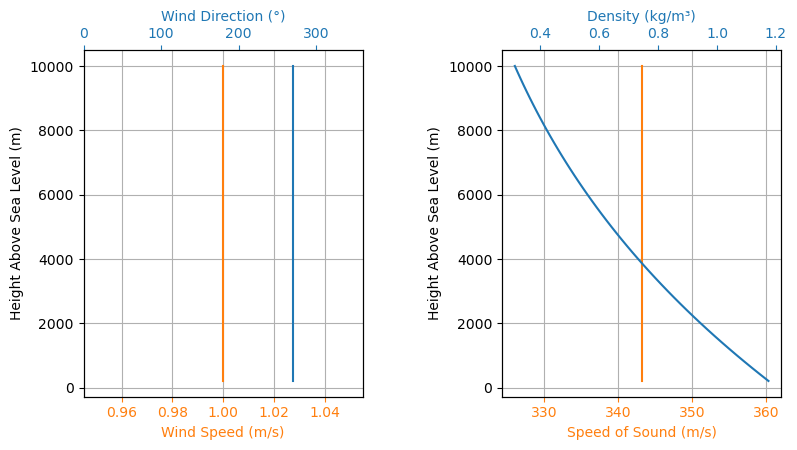

In [42]:
Env.info()

# Define Rocket Motor

In [43]:
"""
Pro75M1670 = SolidMotor(
    thrustSource="engine.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,  #kg/m^3
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)
"""
Pro75M1670 = SolidMotor(
    thrustSource="AeroTech_F44W.csv", #copy here the path to the thrust source file REVERIFY
    burnOut=0.998,
    grainNumber=1,
    grainSeparation=1 / 1000,
    grainDensity=1815,
    grainOuterRadius=8.70 / 1000,
    grainInitialInnerRadius=1 / 1000,
    grainInitialHeight=50 / 1000,
    nozzleRadius=3.0 / 1000,
    throatRadius=2.0 / 1000,
    interpolationMethod="linear",
)

In [19]:
"""
grainNumber=6,
    grainSeparation=6 / 1000,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    grainDensity=1707,
    nozzleRadius=21.642 / 1000,
    throatRadius=8 / 1000,

    Motor Details
Total Burning Time: 5.3 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 5643.542 m/s
Average Thrust: 1500.000 N
Maximum Thrust: 1500.0 N at 0.0 s after ignition.
Total Impulse: 7950.000 Ns

Nozzle Details
Nozzle Radius: 0.021641999999999998 m
Nozzle Throat Radius: 0.008 m

Grain Details
Number of Grains: 6. # each grain has the following info
Grain Spacing: 0.006 m # 
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Motor Details
Total Burning Time: 5.3 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 5643.542 m/s
Average Thrust: 1500.000 N
Maximum Thrust: 1500.0 N at 0.0 s after ignition.
Total Impulse: 7950.000 Ns


"""

'\ngrainNumber=6,\n    grainSeparation=6 / 1000,\n    grainOuterRadius=21.40 / 1000,\n    grainInitialInnerRadius=9.65 / 1000,\n    grainInitialHeight=120 / 1000,\n    grainDensity=1707,\n    nozzleRadius=21.642 / 1000,\n    throatRadius=8 / 1000,\n\n    Motor Details\nTotal Burning Time: 5.3 s\nTotal Propellant Mass: 1.409 kg\nPropellant Exhaust Velocity: 5643.542 m/s\nAverage Thrust: 1500.000 N\nMaximum Thrust: 1500.0 N at 0.0 s after ignition.\nTotal Impulse: 7950.000 Ns\n\nNozzle Details\nNozzle Radius: 0.021641999999999998 m\nNozzle Throat Radius: 0.008 m\n\nGrain Details\nNumber of Grains: 6. # each grain has the following info\nGrain Spacing: 0.006 m # \nGrain Density: 1707 kg/m3\nGrain Outer Radius: 0.0214 m\nGrain Inner Radius: 0.00965 m\nGrain Height: 0.12 m\nGrain Volume: 0.000 m3\nGrain Mass: 0.235 kg\n\nMotor Details\nTotal Burning Time: 5.3 s\nTotal Propellant Mass: 1.409 kg\nPropellant Exhaust Velocity: 5643.542 m/s\nAverage Thrust: 1500.000 N\nMaximum Thrust: 1500.0 N a

In [12]:
grain_mass = 3.14*(0.0087*0.0087-0.001*0.001)*0.05*1707. # grain mass
print(grain_mass)

0.020016845309999996



Motor Details
Total Burning Time: 0.998 s
Total Propellant Mass: 0.021 kg
Propellant Exhaust Velocity: 1980.754 m/s
Average Thrust: 42.263 N
Maximum Thrust: 65.218 N at 0.299 s after ignition.
Total Impulse: 42.178 Ns

Plots


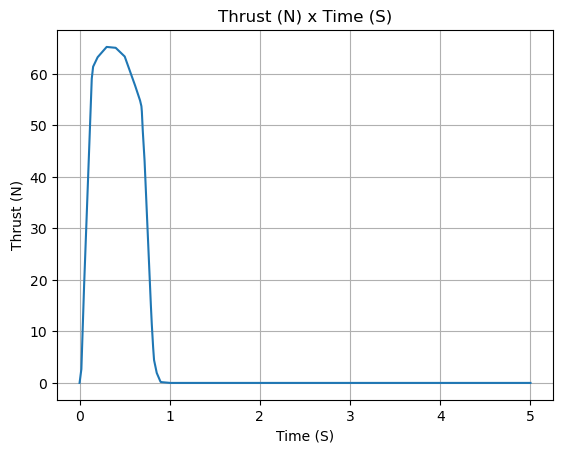

In [44]:
Pro75M1670.info()

In [26]:
0.08*0.29*0.29*2

0.013455999999999997

# Define Rocket Parameters

In [45]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=0.0282,
    mass=0.4203,
    inertiaI=0.018,  #0.08*0.29*0.29*2
    inertiaZ=2.36e-4,
    distanceRocketNozzle=-0.377,
    distanceRocketPropellant=-0.331,
    powerOffDrag="powerOffDragCurve.csv", #copy here the path to the drag curve file NEED TO VERIFY THIS
    powerOnDrag="powerOnDragCurve.csv", #copy here the path to the drag curve file NEED TO VERIFY THIS
    

)

#Calisto.thrustEccentricityX = 0.001
Calisto.setRailButtons([-0.069, -0.255])

In [191]:
Calisto.powerOffDrag

Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)

In [21]:
Calisto.powerOnDrag

Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)

In [46]:
Calisto.thrustEccentricityX

0

In [49]:
if FinSet is not None:
    Calisto.aerodynamicSurfaces.remove(FinSet)
if NoseCone is not None:
    Calisto.aerodynamicSurfaces.remove(NoseCone)

In [50]:
# Rocket.py use append(FinSet, NoseCone) to update parameters
# remove them first. 

NoseCone = Calisto.addNose(length=0.0762, kind="conical", distanceToCM=0.3558)
FinSet = Calisto.addTrapezoidalFins(
    n=3,    # number of fins
    rootChord=0.0762, #0.120,  # root chord, attached to the tube 
    tipChord=0.0305,  # tip chord
    span=0.0559,   # span 
    distanceToCM=-0.29,  # distance to the CM, negative if below the CM
    sweepAngle=39.3,  # 
    radius=None,  # for ellipse fins 
    airfoil=None,
)

# off center by 17*0.04/400=0.0017 m
#offCenterMass = Calisto.addCMEccentricity(x=-0.001, y=0.00)

#Tail = Calisto.addTail(
#    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
#)

In [37]:
17*0.04/400

0.0017000000000000001

In [38]:
"""def drogueTrigger(p, y):
    # p = pressure
    # coordinates, velocity, angles, and angular velocity 
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 + 1400 m (+1400 due to surface elevation).
    return True if y[5] < 0 and y[2] < 800 + 1400 else False


Main = Calisto.addParachute(
    "Main",
    CdS=10.0,  #drag surface area?
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)



Drogue = Calisto.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)"""

In [39]:
"""Calisto.parachutes.remove(Drogue)
Calisto.parachutes.remove(Main)"""

In [40]:
60*0.001/0.015*57*0.2

45.6

# Rocket Info

Inertia Details
Rocket Mass: 0.420 kg (No Propellant)
Rocket Mass: 0.442 kg (With Propellant)
Rocket Inertia I: 0.018 kg*m2
Rocket Inertia Z: 0.000 kg*m2

Geometrical Parameters
Rocket Maximum Radius: 0.0282 m
Rocket Frontal Area: 0.002498 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: -0.377 m
Rocket Center of Mass - Motor reference point: -0.331 m
Rocket Center of Mass - Rocket Loaded Center of Mass: -0.016 m

Aerodynamic Components Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.270/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 0.407 m
Fins Center of Pressure to CM: -0.324 m
Distance - Center of Pressure to CM: -0.147 m
Initial Static Margin: 2.326 c
Final Static Margin: 2.609 c

Mass Plots


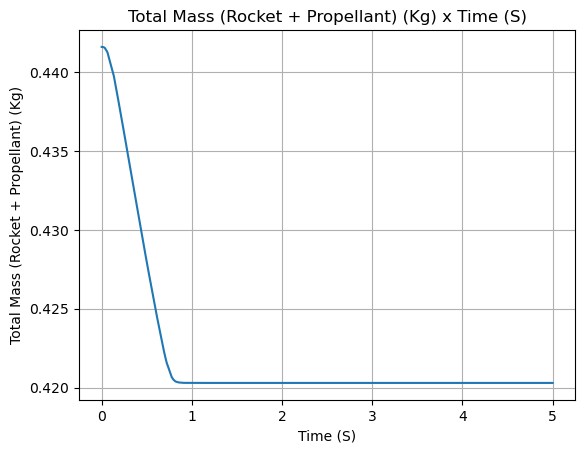

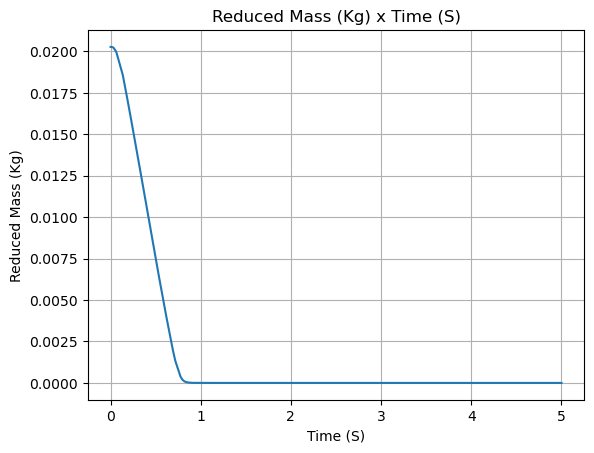


Aerodynamics Plots


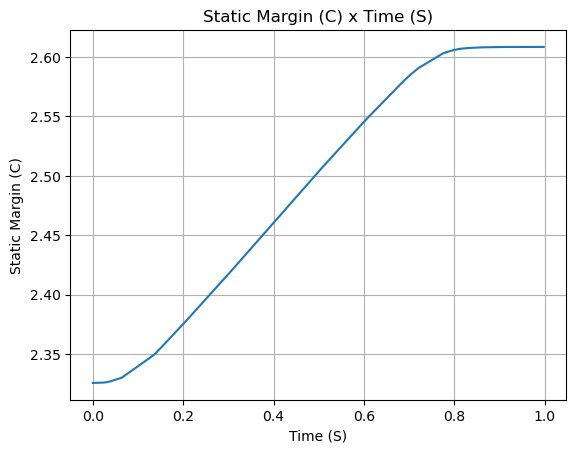

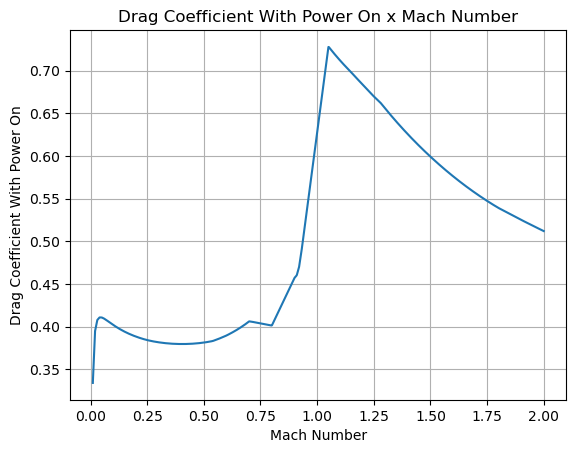

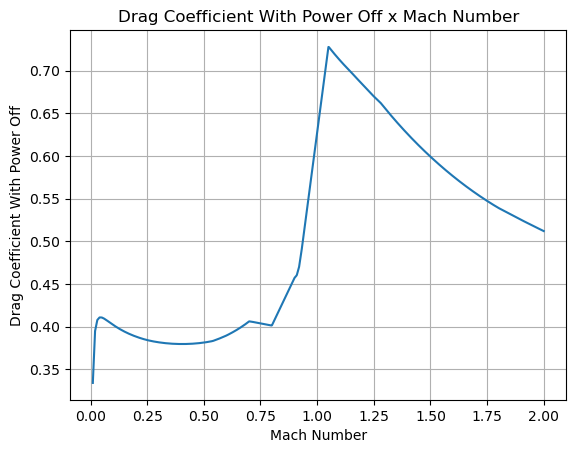

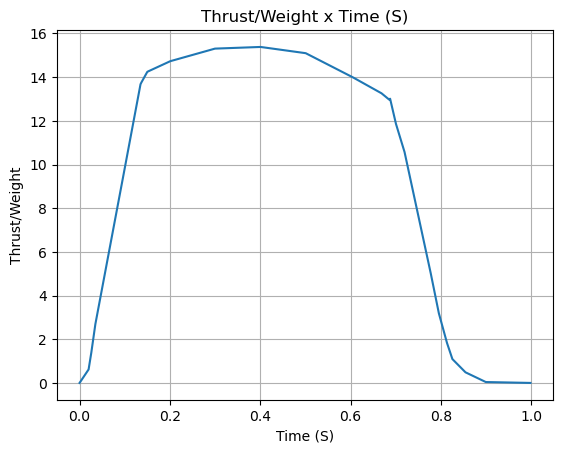

In [51]:
Calisto.allInfo()

# Flight Simulation

In [62]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=90, heading=0, maxTime=30, maxTimeStep=0.01, initialSolution=None, verbose=True)
import csv
import numpy
labels = ["Time", "X", "Y", "Z"]
data = []
new_z = []
for altitude in TestFlight.z[:, 1]:
    new_altitude = altitude - 213.36
    new_z.append(new_altitude)

for i in range(len(TestFlight.time)):
    new_arr = [TestFlight.time[i], TestFlight.x[:, 1][i], TestFlight.y[:, 1][i], new_z[i]]
    data.append(new_arr)

with open ('RocketPy.csv', 'w') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(labels)
    csv_writer.writerows(data)
print(TestFlight.time, TestFlight.x[:, 1], TestFlight.y[:, 1], TestFlight.z[:, 1])

"""arr_time = numpy.array(TestFlight.time)
arr_x = numpy.array(TestFlight.x[:, 1])
arr_y = numpy.array(TestFlight.y[:, 1])
arr_z = numpy.array(new_z)
arr_time = arr_time.reshape(arr_time.size, 1)
arr_x = arr_x.reshape(arr_x.size, 1)
arr_y = arr_y.reshape(arr_y.size, 1)
arr_z = arr_z.reshape(arr_z.size, 1)"""

"""data = [TestFlight.time, 
        TestFlight.x[:, 1], 
        TestFlight.y[:, 1], 
        new_z]"""

flight line 1314 19.586535147458836 0.002498320141840747 0.40961999805436183 -0.23052096077917852
flight line 1314 20.574154596094 0.002498320141840747 0.4092458234956281 -0.25411770086537994
flight line 1314 20.576789355933506 0.002498320141840747 0.4092448252770312 -0.2541819522886189
flight line 1314 19.76106706206062 0.002498320141840747 0.40955387399997906 -0.23460893959815568
flight line 1314 19.761149542822302 0.002498320141840747 0.40955384275089557 -0.23461087388033255
flight line 1314 19.93576859594332 0.002498320141840747 0.4094876856827674 -0.2387361696557532
flight line 1314 19.93585101377311 0.002498320141840747 0.4094876544575266 -0.23873811900190314
flight line 1314 20.285432261080558 0.002498320141840747 0.4093552103170901 -0.2471027481444047
flight line 1314 20.285432035510166 0.002498320141840747 0.40935521040255085 -0.24710274269424112
flight line 1314 20.63535952787244 0.002498320141840747 0.4092166675379656 -0.2556132671227377
flight line 1314 20.635359264759288 0

'data = [TestFlight.time, \n        TestFlight.x[:, 1], \n        TestFlight.y[:, 1], \n        new_z]'

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 213.36 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 1.000 | e1: 0.000 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 180.00° | Nutation θ: -0.00° | Precession ψ: -180.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 90.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: -1.00 m/s


 Rail Departure State

Rail Departure Time: 0.229 s
Rail Departure Velocity: 19.561 m/s
Rail Departure Static Margin: 2.387 c
flight line 1314 1.0 0.002498320141840747 0.333865758 -0.000489851681161332
flight line 1314 1.0 0.002498320141840747 0.333865758 -0.000489851681161332
flight line 1314 1.0 0.002498320141840747 0.333865758 -0.000489851681161332
flight line 1314 1.0 0.002498320141840747 0.333865758 -0.000489851681161332
flight line 1314 1.0 0.002498320141840747 0.333865758 -0.

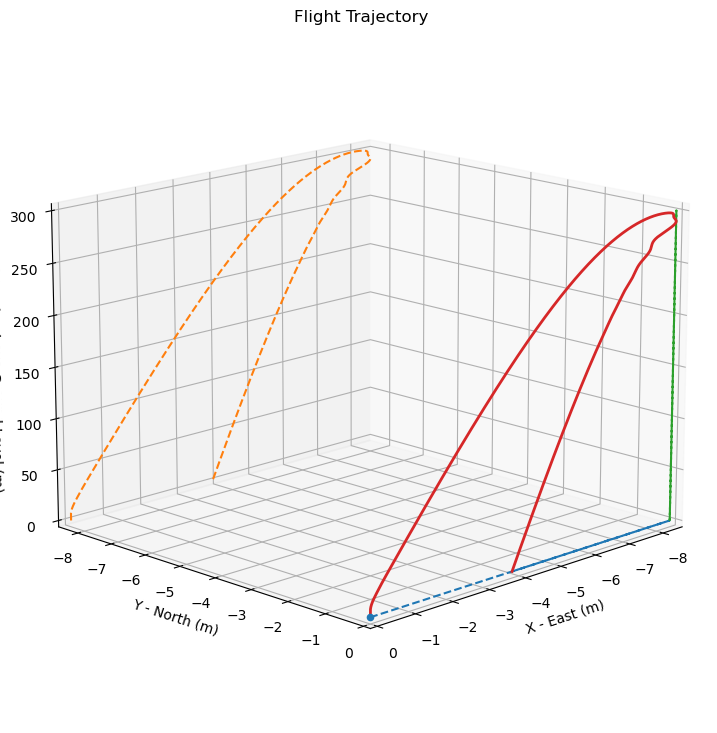



Trajectory Kinematic Plots



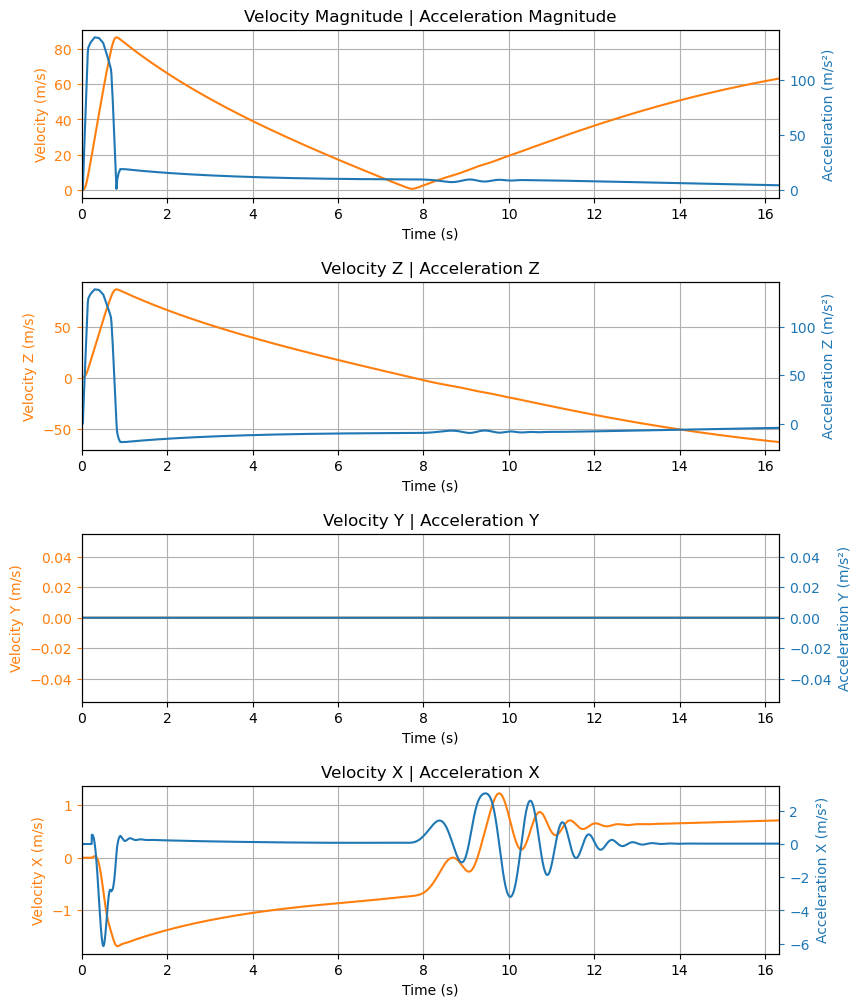



Angular Position Plots



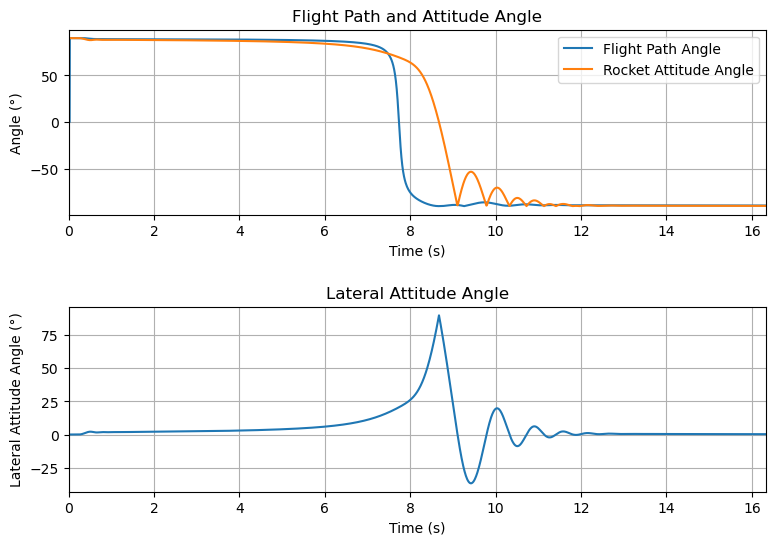



Path, Attitude and Lateral Attitude Angle plots



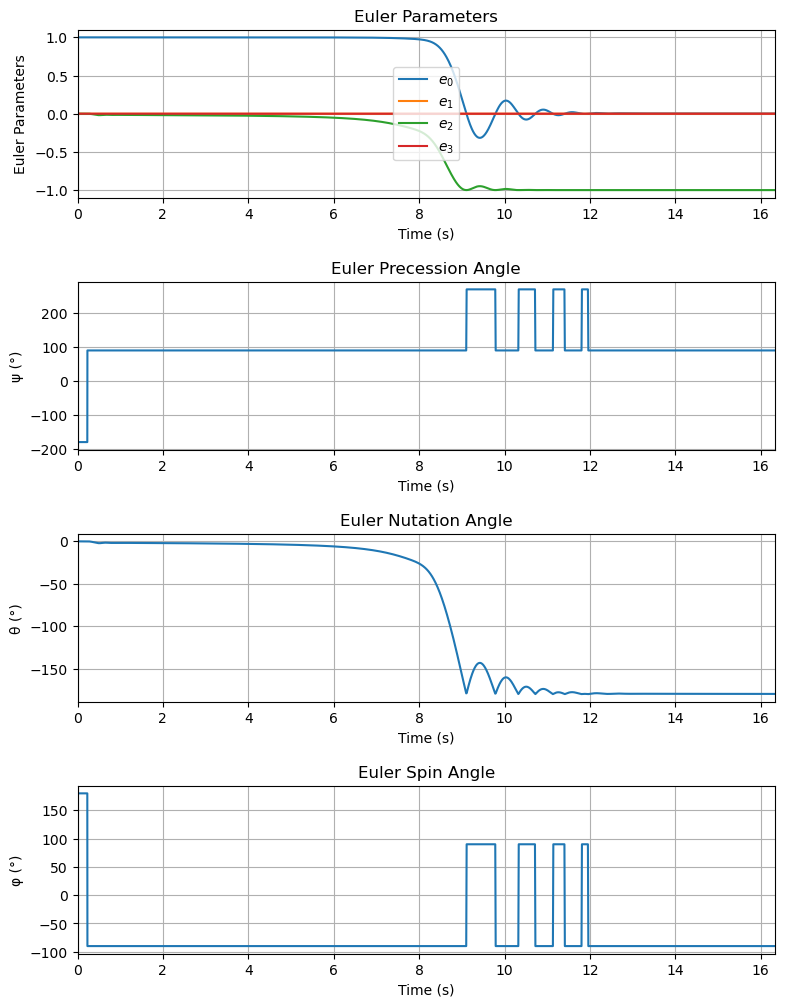



Trajectory Angular Velocity and Acceleration Plots



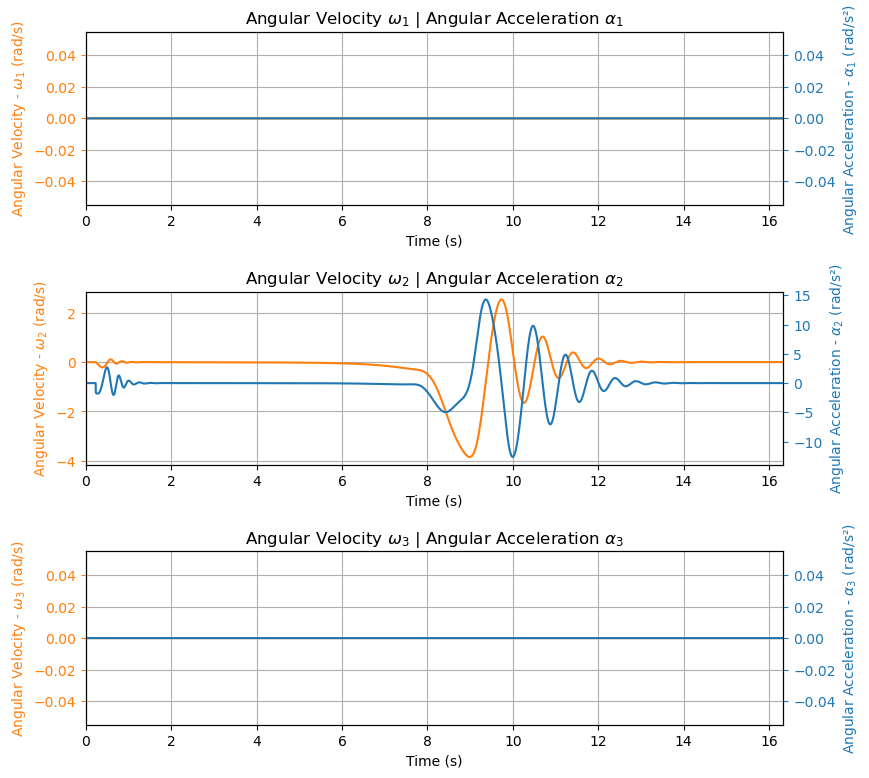



Trajectory Force Plots



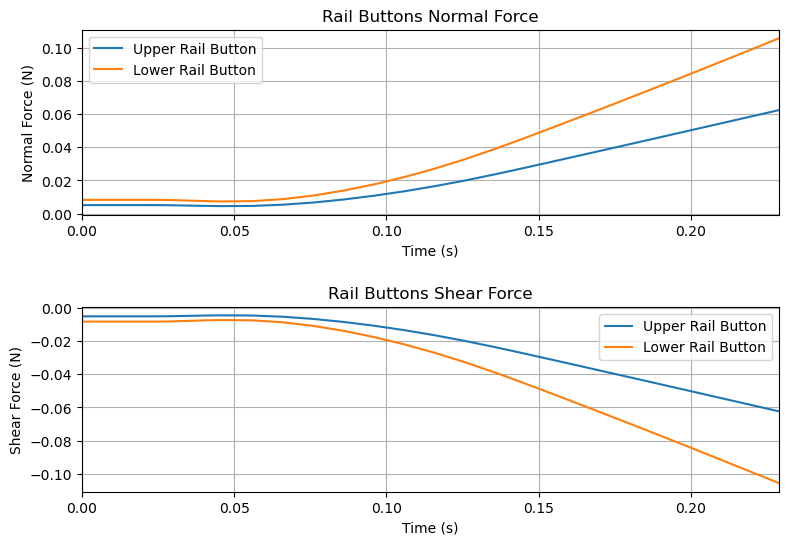

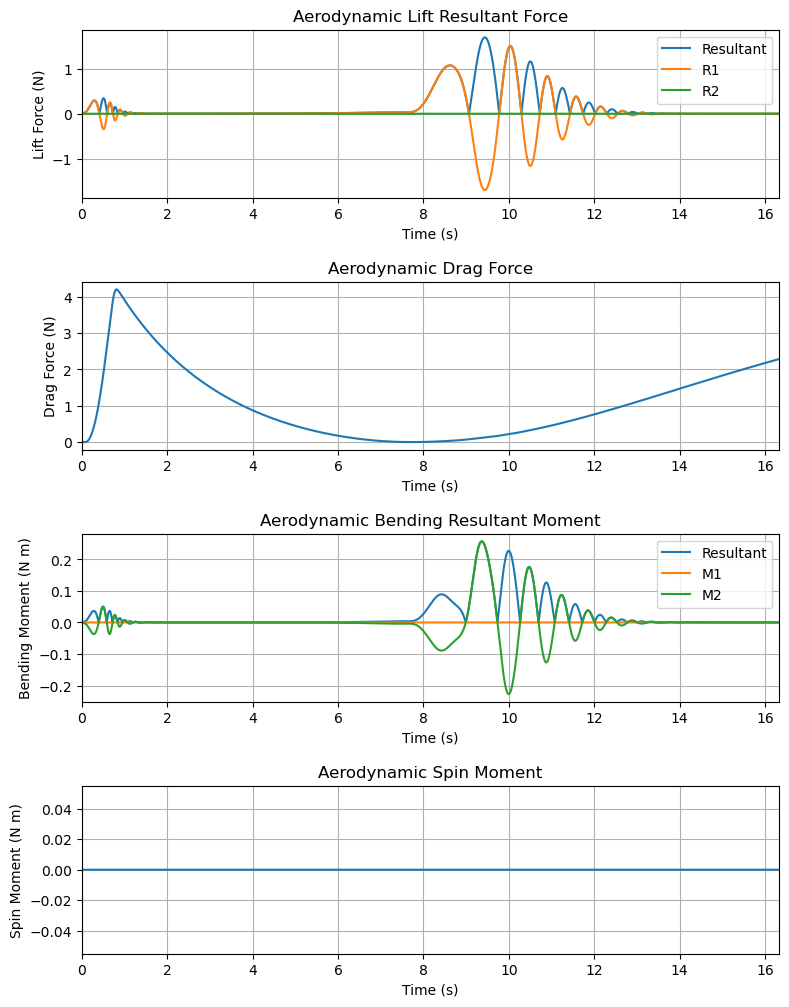



Trajectory Energy Plots



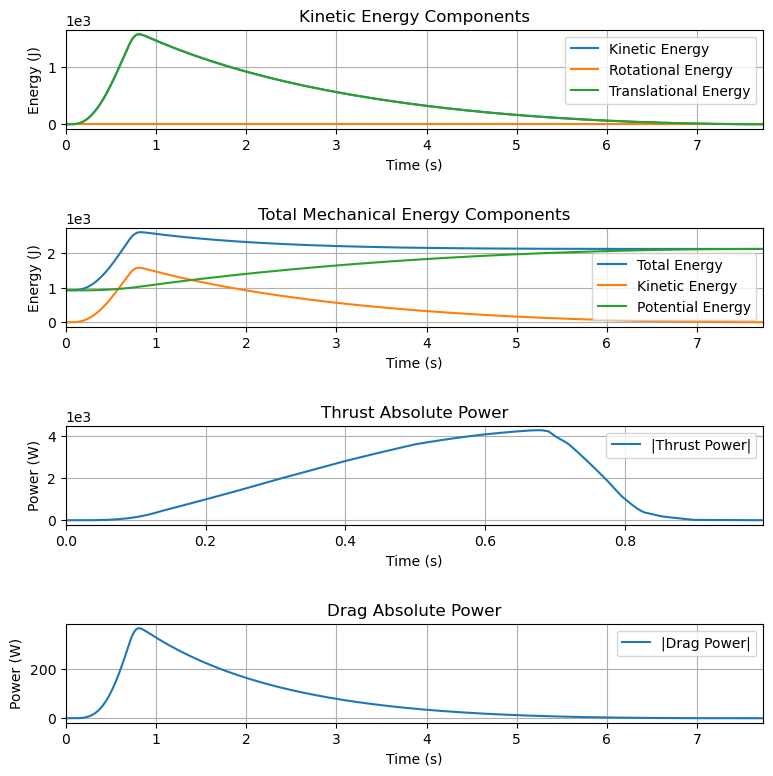



Trajectory Fluid Mechanics Plots



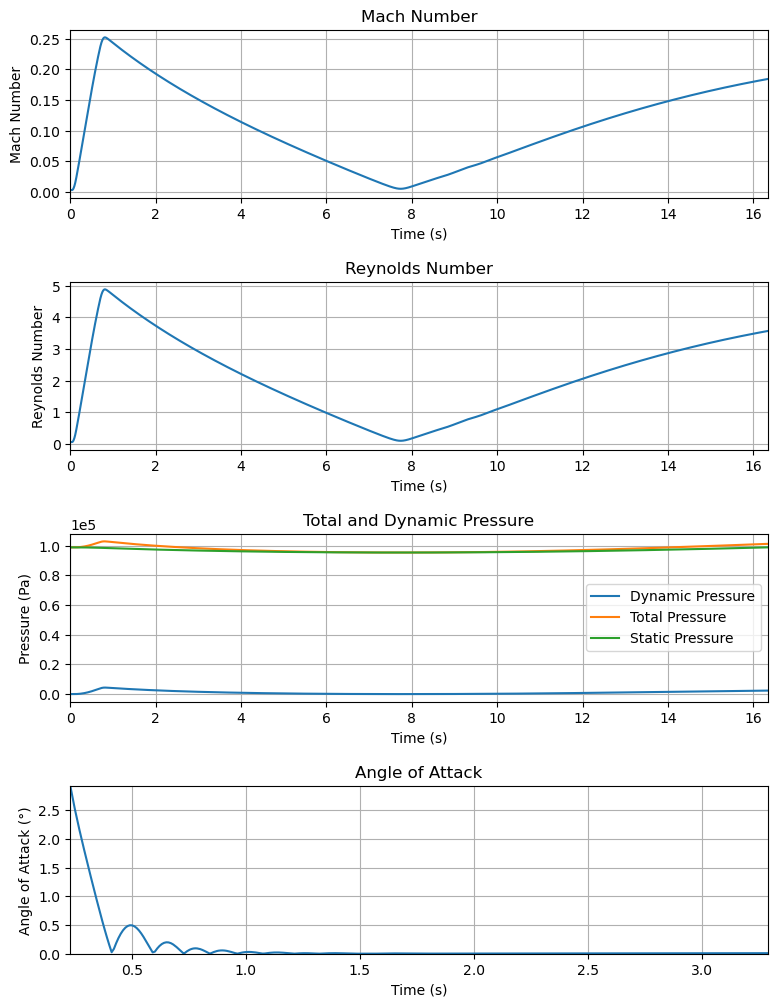



Trajectory Stability and Control Plots



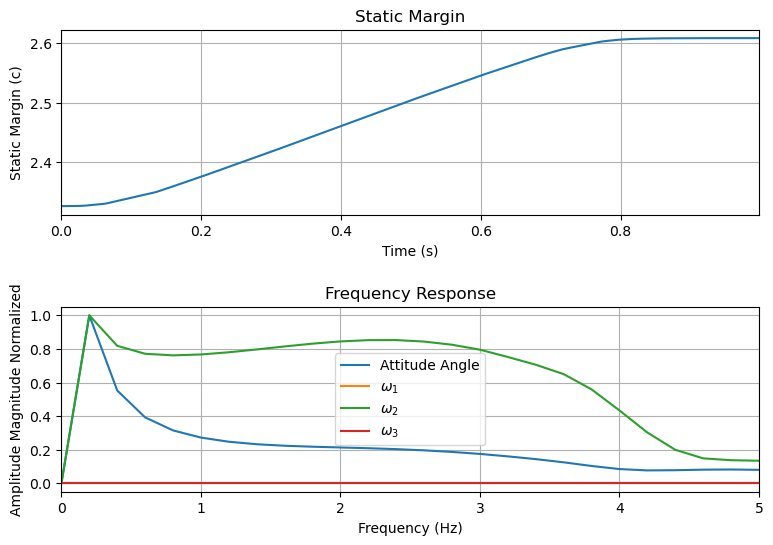

In [53]:
TestFlight.allInfo()

In [54]:
TestFlight.exportKML(
    fileName="trajectory.kml",
    extrude=True,
    altitudeMode="relativetoground",
)

File  trajectory.kml  saved with success!


# Additional Flight Simulations (don't need to run)

In [216]:
import matplotlib.pyplot as plt

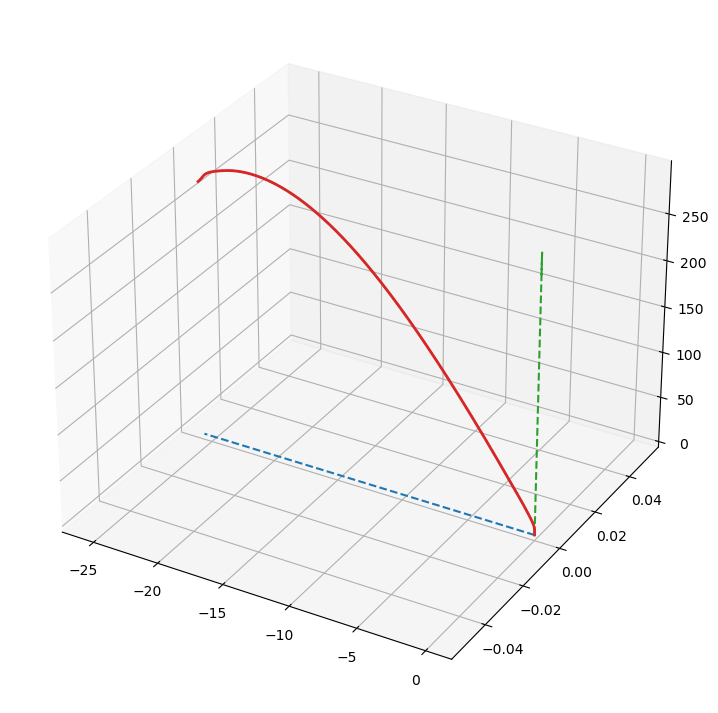

In [225]:
# Attitude vs time
plt.figure(figsize=(9, 9))
plt.subplot(111, projection="3d") 
#plt.plot(TestFlight.time, TestFlight.z[:,1])
plt.plot(TestFlight.x[:, 1], TestFlight.y[:, 1], zs=0, zdir="z", linestyle="--")
plt.plot(
TestFlight.x[:, 1],
TestFlight.z[:, 1] - TestFlight.env.elevation,
zdir="y",
linestyle="--",
)
#zs=minXY,
plt.plot(
TestFlight.y[:, 1],
TestFlight.z[:, 1] - TestFlight.env.elevation,
#zs=minXY,
zdir="x",
linestyle="--",
)
plt.plot(
TestFlight.x[:, 1], TestFlight.y[:, 1], TestFlight.z[:, 1] - TestFlight.env.elevation, linewidth="2"
)

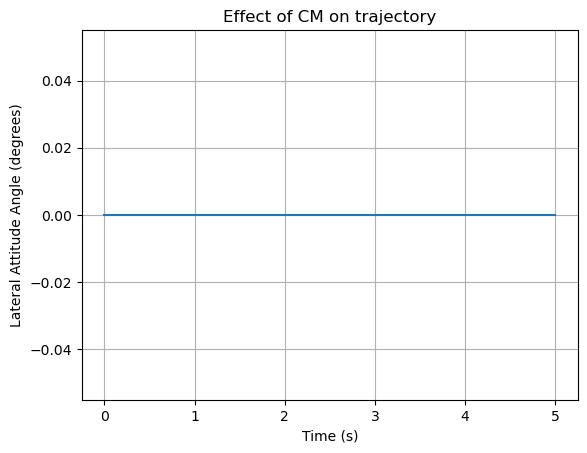

In [79]:
# Attitude vs time 
plt.plot(TestFlight.time, TestFlight.lateralAttitudeAngle[:,1])
plt.title('Effect of CM on trajectory')
plt.xlabel('Time (s)')
plt.ylabel('Lateral Attitude Angle (degrees)')
plt.grid()

# Explain the terminology

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m

Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s

Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000

Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°

Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°

Launch Rail Heading: 0.00°


Surface Wind Conditions. (normal and side)

Frontal Surface Wind Speed: -0.89 m/s

Lateral Surface Wind Speed: -1.55 m/s


 Rail Departure State

Rail Departure Time: 0.363 s

Rail Departure Velocity: 25.809 m/s

Rail Departure Static Margin: -3.327 c

Rail Departure Angle of Attack: 3.937° (atan(v_wind/v_rocket))

Rail Departure Thrust-Weight Ratio: 10.143

Rail Departure Reynolds Number: 3.295e+00. #this is not right. 


BurnOut State

BurnOut time: 3.900 s

Altitude at burnOut: 178.294 m (AGL)

Rocket velocity at burnOut: 41.091 m/s

Freestream velocity at burnOut: 40.562 m/s

Mach Number at burnOut: 0.000

Kinetic energy at burnOut: 0.000e+00 J


because this is a unstable flight, the numbers below have no meaning. 

Apogee

Apogee Altitude: 0.000 m (ASL) | -1471.466 m (AGL)

Apogee Time: 0.000 s

Apogee Freestream Speed: 1.782 m/s


Events

No Parachute Events Were Triggered.


Impact

X Impact: 0.000 m
Y Impact: 0.000 m
Time of Impact: 2.400 s
Velocity at Impact: 0.000 m/s


Maximum Values

Maximum Speed: 138.410 m/s at 1.61 s

Maximum Mach Number: 0.401 Mach at 1.61 s

Maximum Reynolds Number: 1.754e+01 at 1.61 s

Maximum Dynamic Pressure: 9.468e+03 Pa at 1.61 s

Maximum Acceleration: 262.028 m/s² at 1.83 s

Maximum Gs: 26.719 g at 1.83 s

Maximum Upper Rail Button Normal Force: 2.200 N

Maximum Upper Rail Button Shear Force: 0.363 N

Maximum Lower Rail Button Normal Force: 0.363 N

Maximum Lower Rail Button Shear Force: 5.438 N


Numerical Integration Information

Maximum Allowed Flight Time: 2.400000 s

Maximum Allowed Time Step: inf s

Minimum Allowed Time Step: 0.000000e+00 s

Relative Error Tolerance:  1e-06

Absolute Error Tolerance:  [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 1e-06, 1e-06, 1e-06, 1e-06, 0.001, 0.001, 0.001]

Allow Event Overshoot:  True

Terminate Simulation on Apogee:  False

Number of Time Steps Used:  8447

Number of Derivative Functions Evaluation:  98993

Average Function Evaluations per Time Step: 11.719309


# angles

Pitch angle (attitude) is the angle between the longitudinal axis (where the airplane is pointed) and the horizon. 



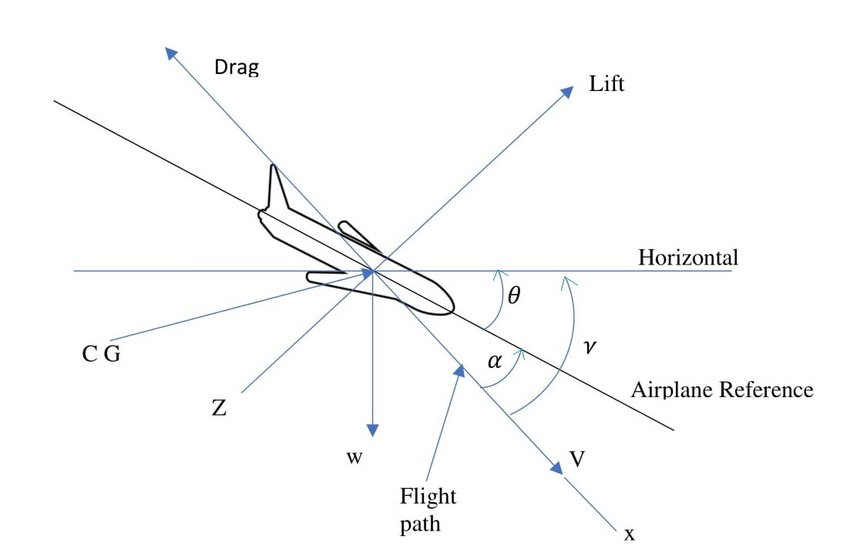

Definition of aircraft coordinates and angles [2]. α is the angle of attack, θ is the pitch angle, ν is the flight path angle.


Pitch refers to the aircraft’s nose-up or nose-down attitude with respect to the horizon, specifically the angle between the longitudinal axis (the axis running fore-and-aft through the center of the aircraft) and the horizontal plane. Nose up is usually denoted as positive pitch and nose down as negative pitch.

Attitude refers to the aircraft’s relation to the horizon in both pitch and roll. Often when describing attitude only one of these is mentioned, for example “a nose-down attitude” or “left-wing-low attitude.” Attitude always refers to the position, while “pitch” and “roll” are often used in their verb forms to describe a change in attitude, such as “the airplane pitched nose up and then rolled rapidly left until it was inverted.”

Angle of attack refers to the angle between an airfoil (most often the wing) and the air passing over it. Each airfoil design has a fore-and-aft reference line called the chord, which is generally the line between the forward-most and rear-most points of the airfoil’s cross-section. The angle of attack is the angle between the chord and the relative wind. On an airplane, increasing the pitch increases the angle of attack, at least momentarily, and vice-versa. But angle of attack and pitch are not the same thing and this sometimes results in pilots coming to their grief. There are two reasons for the difference: first, the wing is often mounted such that the angle of attack is offset from the pitch when on the ground, and more importantly, the angle of attack changes when the airplane climbs or descends, or is in a rising or sinking airmass, even though the pitch remains constant. This is because in those conditions the relative wind on the airplane is not horizontal but is coming from above or below.


The difference between pitch and angle of attack is important to understand because the wing’s performance is based entirely on angle of attack. Most importantly, as angle of attack increases the wing’s lift increases, up to a point; past the critical angle of attack the lift rapidly decreases to near zero. This is an aerodynamic stall, which causes the airplane to drop precipitously, and if one wing should stall before the other, the airplane will roll rapidly; the combination is known as a spin. Initial pilot training involves a lot of practice to become familiar with how to control the airplane’s pitch and how it behaves near the critical angle of attack, including recovering from stalls or near-stalls. In maneuvering flight or in severe weather it is possible to stall — to have the angle of attack reach critical — in any attitude, including in a level pitch attitude that looks like normal level flight. Failing to recognize this is a leading cause of maneuvering accidents.

Precession, nutation, and intrinsic rotation (spin) are defined as the movements obtained by changing one of the Euler angles while leaving the other two constant. These motions are not expressed in terms of the external frame, or in terms of the co-moving rotated body frame, but in a mixture. They constitute a mixed axes of rotation system, where the first angle moves the line of nodes around the external axis z, the second rotates around the line of nodes N and the third one is an intrinsic rotation around Z, an axis fixed in the body that moves.

The static definition implies that:

α (precession) represents a rotation around the z axis, rocket pitch 

β (nutation) represents a rotation around the N or x′ axis, rocket goes sideway 

γ (intrinsic rotation) represents a rotation around the Z or z″ axis. 


#understand the Euler angles

https://demonstrations.wolfram.com/EulerAnglesPrecessionNutationAndSpin/

# EXAMPLES (Don't Run)

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1400.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 1.000 | e1: 0.000 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 180.00° | Nutation θ: -0.00° | Precession ψ: -180.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 90.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -5.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


 Rail Departure State

Rail Departure Time: 0.000 s
Rail Departure Velocity: 0.000 m/s
Rail Departure Static Margin: 2.051 c
flight line 1314 5.0 0.012667686977437444 0.3640935837870204 -0.06160897380404596
flight line 1314 5.0 0.012667686977437444 0.3640935837870204 -0.06160897380404596
flight line 1314 5.0 0.012667686977437444 0.3640935837870204 -0.06160897380404596
flight line 1314 5.0 0.012667686977437444 0.3640935837870204 -0.06160897380404596
flight line 1314 5.0 0.0126676869

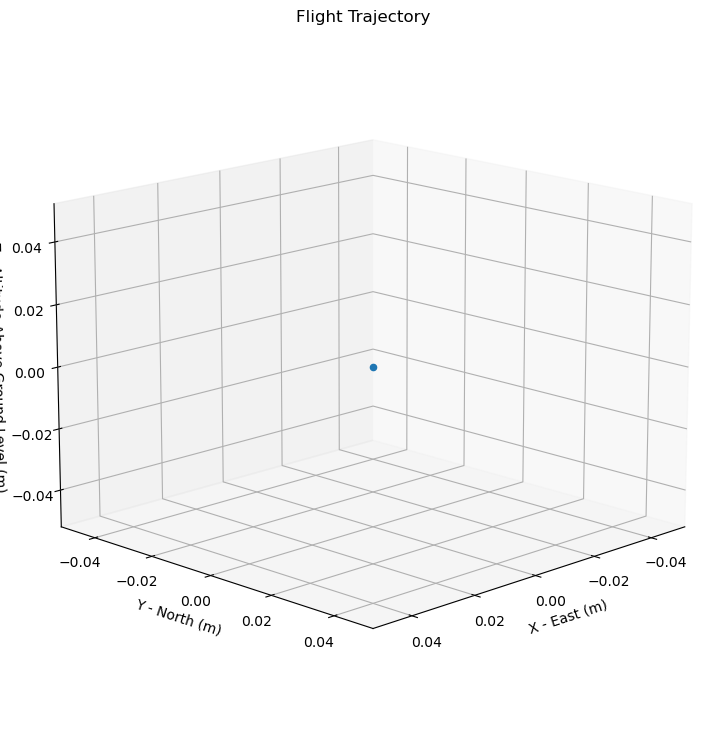



Trajectory Kinematic Plots



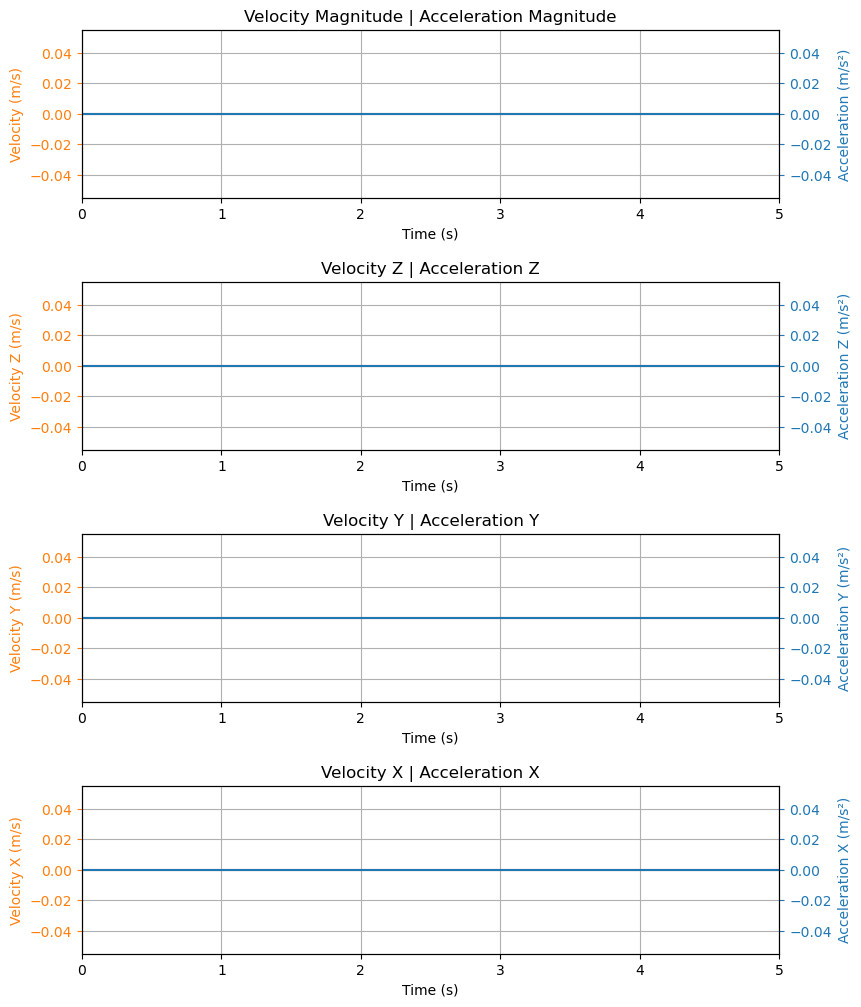



Angular Position Plots



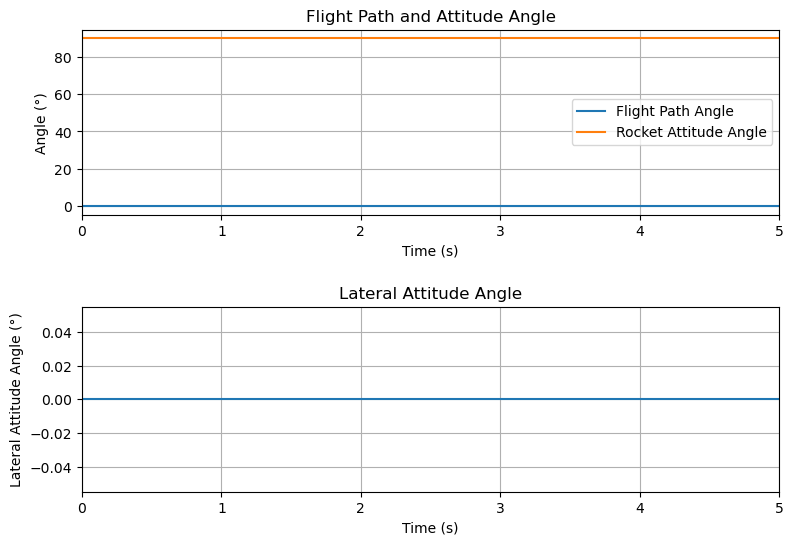



Path, Attitude and Lateral Attitude Angle plots



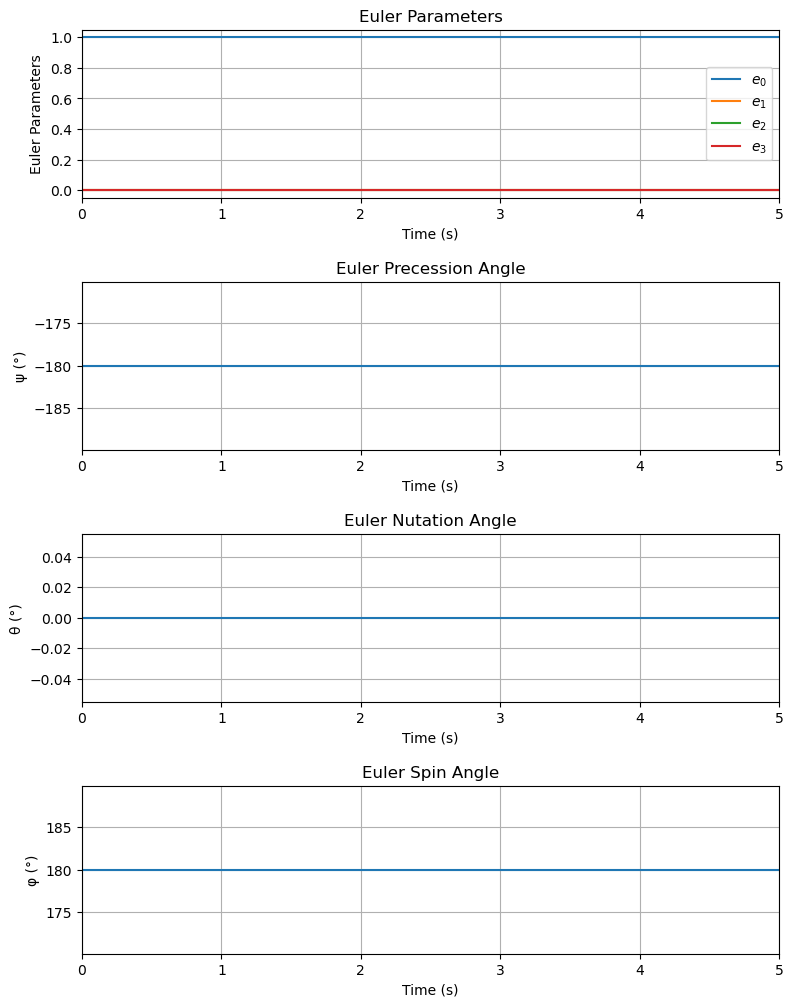



Trajectory Angular Velocity and Acceleration Plots



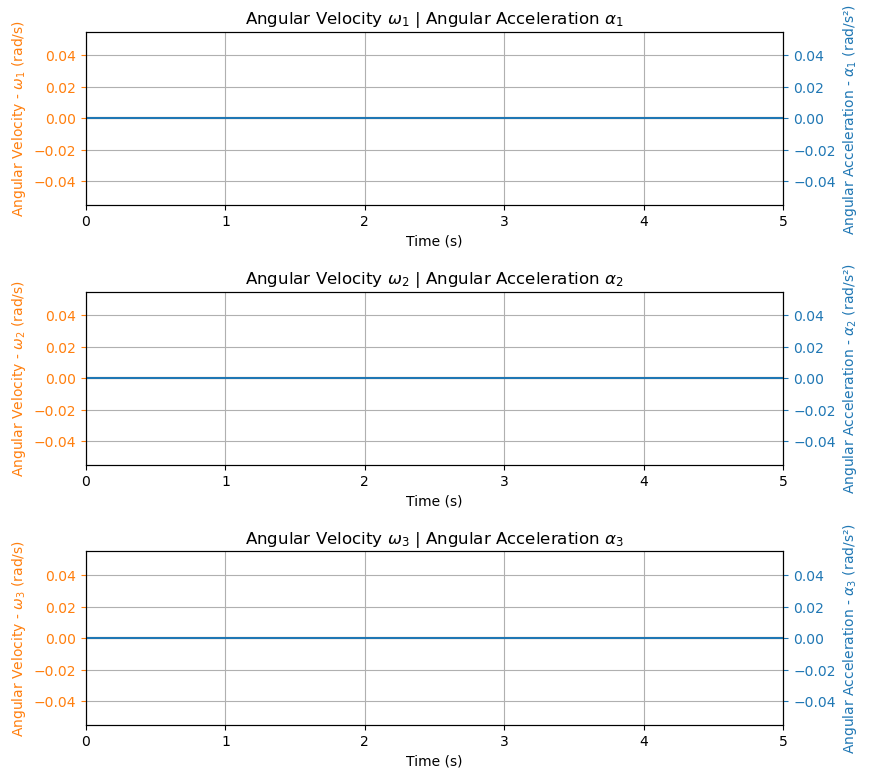



Trajectory Force Plots



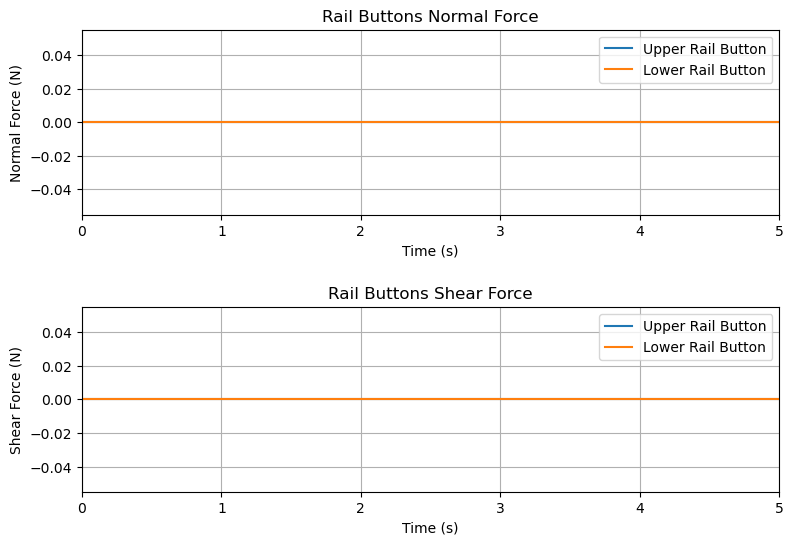

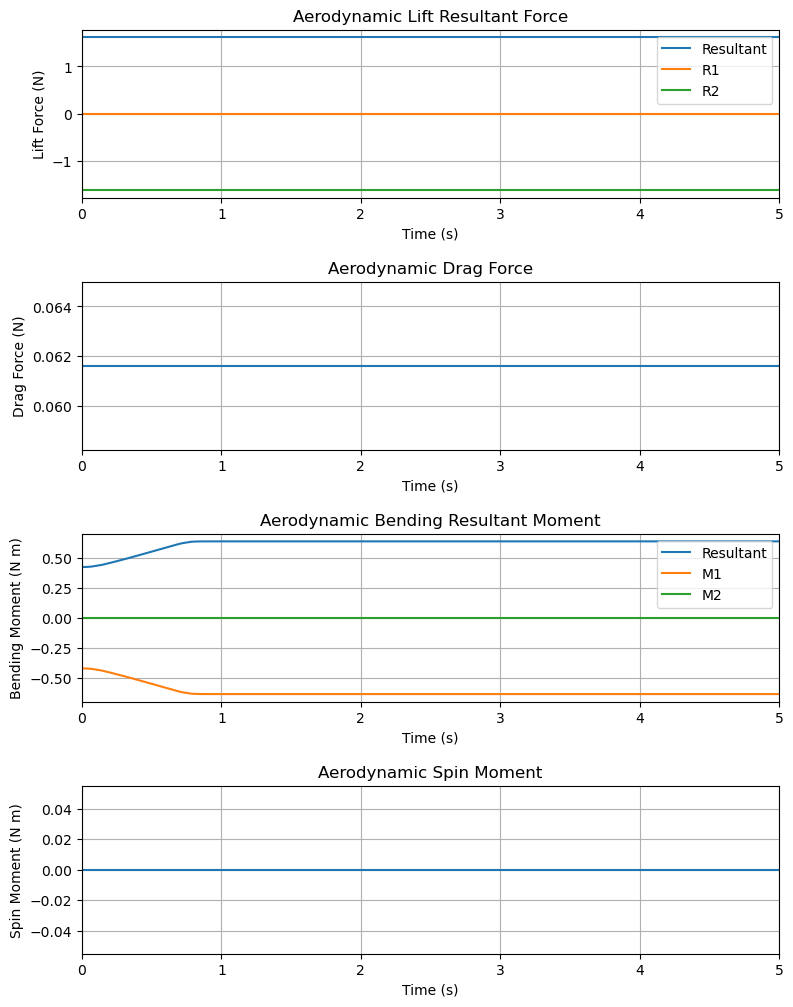



Trajectory Energy Plots



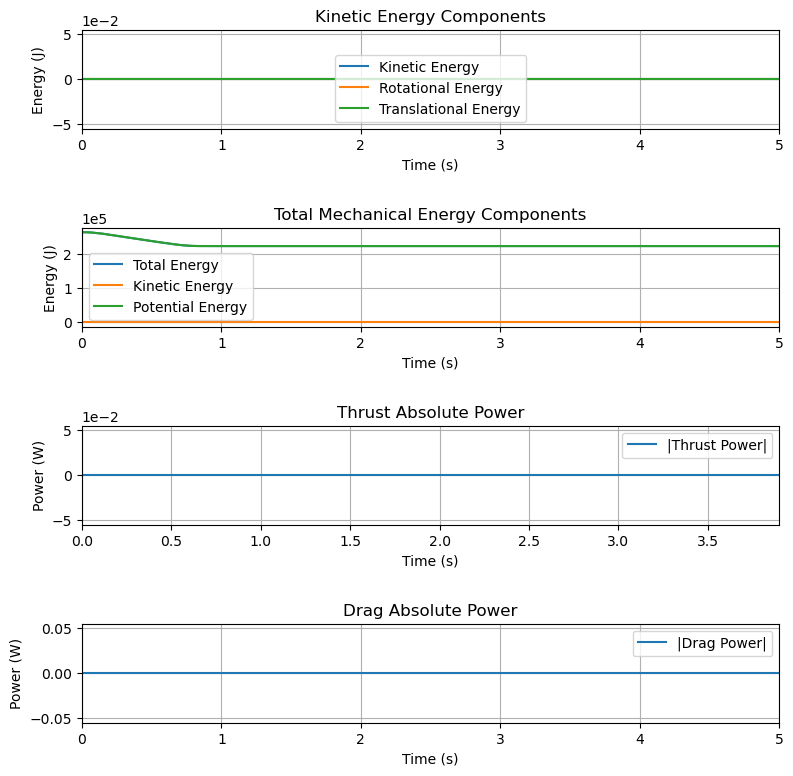



Trajectory Fluid Mechanics Plots



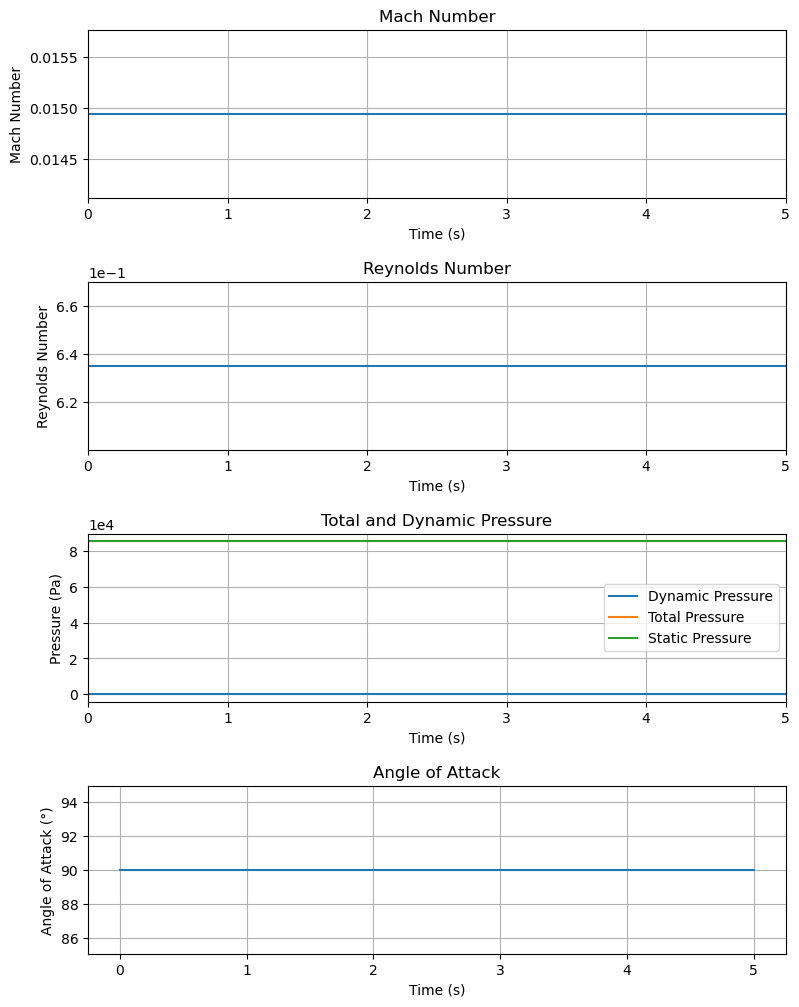



Trajectory Stability and Control Plots



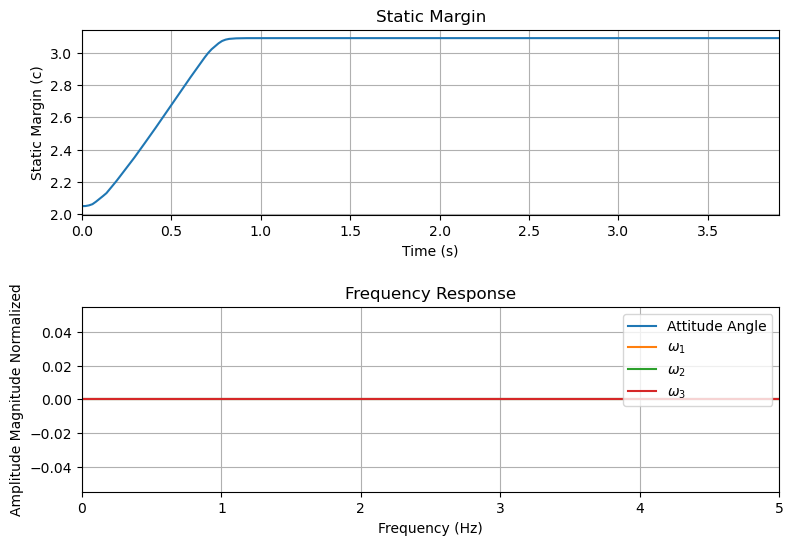

In [80]:
#TestFlight.allInfo()

In [73]:
"""# Helper class
from rocketpy import Function

# Prepare Rocket Class
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="powerOffDragCurve.csv",
    powerOnDrag="powerOnDragCurve.csv",
)"""


Simulating Rocket with Static Margin of -1.444->-0.405 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of -0.046->0.993 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 1.352->2.391 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 2.750->3.789 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 4.147->5.186 c
Simulation Completed at Time: 5.0000 s


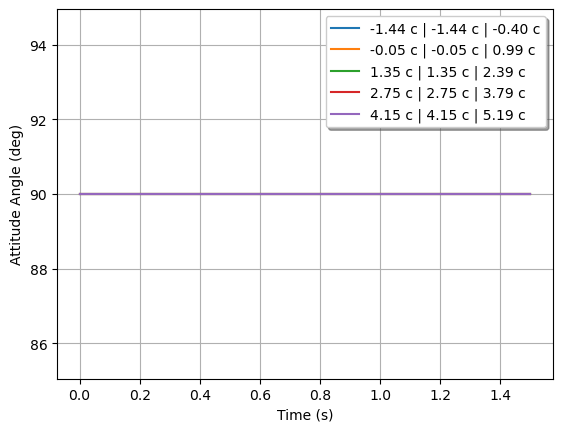

In [74]:
"""Calisto.setRailButtons([0.2, -0.5])
Nose = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)
FinSet = Calisto.addTrapezoidalFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)
Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

# Prepare Environment Class
Env = Environment(5.2, 9.8)
Env.setAtmosphericModel(type="CustomAtmosphere", wind_v=-5)

# Simulate Different Static Margins by Varying Fin Position
simulation_results = []

for factor in [0.5, 0.7, 0.9, 1.1, 1.3]:
    # Modify rocket fin set by removing previous one and adding new one
    Calisto.aerodynamicSurfaces.remove(FinSet)
    FinSet = Calisto.addTrapezoidalFins(
        4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956*factor
    )
    # Simulate
    print(
        "Simulating Rocket with Static Margin of {:1.3f}->{:1.3f} c".format(
            Calisto.staticMargin(0), Calisto.staticMargin(Calisto.motor.burnOutTime)
        )
    )
    TestFlight = Flight(
        rocket=Calisto,
        environment=Env,
        inclination=90,
        heading=0,
        maxTimeStep=0.01,
        maxTime=5,
        terminateOnApogee=True,
        verbose=True,
    )
    # Post process flight data
    TestFlight.postProcess()
    # Store Results
    staticMarginAtIgnition = Calisto.staticMargin(0)
    staticMarginAtOutOfRail = Calisto.staticMargin(TestFlight.outOfRailTime)
    staticMarginAtSteadyState = Calisto.staticMargin(TestFlight.tFinal)
    simulation_results += [
        (
            TestFlight.attitudeAngle,
            "{:1.2f} c | {:1.2f} c | {:1.2f} c".format(
                staticMarginAtIgnition,
                staticMarginAtOutOfRail,
                staticMarginAtSteadyState,
            ),
        )
    ]

Function.comparePlots(
    simulation_results,
    lower=0,
    upper=1.5,
    xlabel="Time (s)",
    ylabel="Attitude Angle (deg)",
)"""

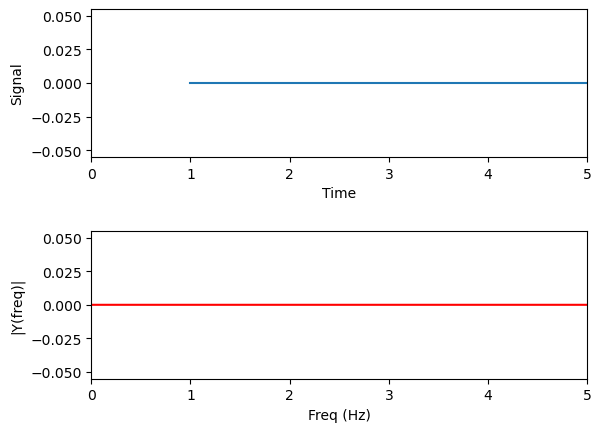

In [75]:
"""import numpy as np
import matplotlib.pyplot as plt

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)

Env.setAtmosphericModel(type="CustomAtmosphere", wind_v=-5)

# Prepare Motor
Pro75M1670 = SolidMotor(
    thrustSource="AeroTech_F44W.csv",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

# Prepare Rocket
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="powerOffDragCurve.csv",
    powerOnDrag="powerOnDragCurve.csv",
)

Calisto.setRailButtons([0.2, -0.5])

Nose = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)
FinSet = Calisto.addTrapezoidalFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)
Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

# Simulate first 5 seconds of Flight
TestFlight = Flight(
    rocket=Calisto,
    environment=Env,
    inclination=90,
    heading=0,
    maxTimeStep=0.01,
    maxTime=5,
)
TestFlight.postProcess()

# Perform a Fourier Analysis
Fs = 100.0
# sampling rate
Ts = 1.0 / Fs
# sampling interval
t = np.arange(1, 400, Ts)  # time vector
ff = 5
# frequency of the signal
y = TestFlight.attitudeAngle(t) - np.mean(TestFlight.attitudeAngle(t))
n = len(y)  # length of the signal
k = np.arange(n)
T = n / Fs
frq = k / T  # two sides frequency range
frq = frq[range(n // 2)]  # one side frequency range
Y = np.fft.fft(y) / n  # fft computing and normalization
Y = Y[range(n // 2)]
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Signal")
ax[0].set_xlim((0, 5))
ax[1].plot(frq, abs(Y), "r")  # plotting the spectrum
ax[1].set_xlabel("Freq (Hz)")
ax[1].set_ylabel("|Y(freq)|")
ax[1].set_xlim((0, 5))
plt.subplots_adjust(hspace=0.5)
plt.show()"""

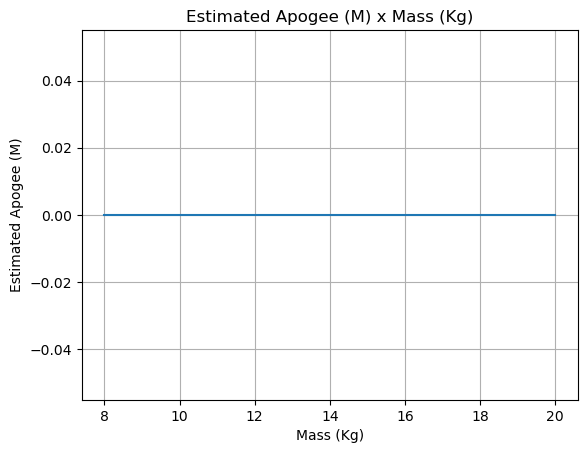

In [76]:
"""def apogee(mass):
    # Prepare Environment
    Env = Environment(
        railLength=5.2,
        latitude=32.990254,
        longitude=-106.974998,
        elevation=1400,
        date=(2018, 6, 20, 18),
    )

    Env.setAtmosphericModel(type="CustomAtmosphere", wind_v=-5)

    # Prepare Motor
    Pro75M1670 = SolidMotor(
        thrustSource="AeroTech_F44W.csv",
        burnOut=3.9,
        grainNumber=5,
        grainSeparation=5 / 1000,
        grainDensity=1815,
        grainOuterRadius=33 / 1000,
        grainInitialInnerRadius=15 / 1000,
        grainInitialHeight=120 / 1000,
        nozzleRadius=33 / 1000,
        throatRadius=11 / 1000,
        interpolationMethod="linear",
    )

    # Prepare Rocket
    Calisto = Rocket(
        motor=Pro75M1670,
        radius=127 / 2000,
        mass=mass,
        inertiaI=6.60,
        inertiaZ=0.0351,
        distanceRocketNozzle=-1.255,
        distanceRocketPropellant=-0.85704,
        powerOffDrag="powerOffDragCurve.csv",
        powerOnDrag="powerOnDragCurve.csv",
    )

    Calisto.setRailButtons([0.2, -0.5])
    Nose = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)
    FinSet = Calisto.addTrapezoidalFins(
        4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
    )
    Tail = Calisto.addTail(
        topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
    )

    # Simulate Flight until Apogee
    TestFlight = Flight(
        rocket=Calisto,
        environment=Env,
        inclination=85,
        heading=0,
        terminateOnApogee=True,
    )
    return TestFlight.apogee


apogeebymass = Function(apogee, inputs="Mass (kg)", outputs="Estimated Apogee (m)")
apogeebymass.plot(8, 20, 20)"""

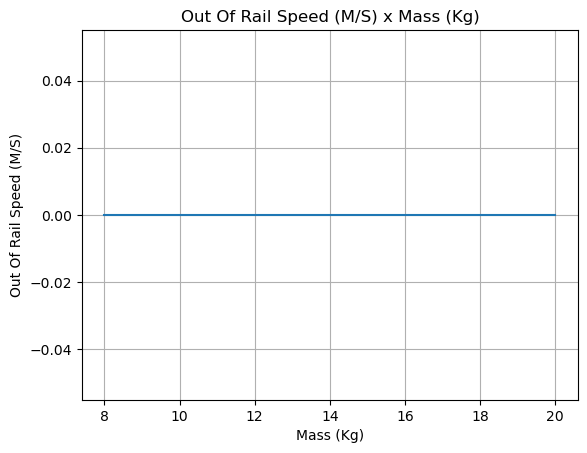

In [77]:
"""def speed(mass):
    # Prepare Environment
    Env = Environment(
        railLength=5.2,
        latitude=32.990254,
        longitude=-106.974998,
        elevation=1400,
        date=(2018, 6, 20, 18),
    )

    Env.setAtmosphericModel(type="CustomAtmosphere", wind_v=-5)

    # Prepare Motor
    Pro75M1670 = SolidMotor(
        thrustSource="AeroTech_F44W.csv",
        burnOut=3.9,
        grainNumber=5,
        grainSeparation=5 / 1000,
        grainDensity=1815,
        grainOuterRadius=33 / 1000,
        grainInitialInnerRadius=15 / 1000,
        grainInitialHeight=120 / 1000,
        nozzleRadius=33 / 1000,
        throatRadius=11 / 1000,
        interpolationMethod="linear",
    )

    # Prepare Rocket
    Calisto = Rocket(
        motor=Pro75M1670,
        radius=127 / 2000,
        mass=mass,
        inertiaI=6.60,
        inertiaZ=0.0351,
        distanceRocketNozzle=-1.255,
        distanceRocketPropellant=-0.85704,
        powerOffDrag="powerOffDragCurve.csv",
        powerOnDrag="powerOnDragCurve.csv",
    )

    Calisto.setRailButtons([0.2, -0.5])
    Nose = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)
    FinSet = Calisto.addTrapezoidalFins(
        4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
    )
    Tail = Calisto.addTail(
        topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
    )

    # Simulate Flight until Apogee
    TestFlight = Flight(
        rocket=Calisto,
        environment=Env,
        inclination=85,
        heading=0,
        terminateOnApogee=True,
    )
    return TestFlight.outOfRailVelocity


speedbymass = Function(speed, inputs="Mass (kg)", outputs="Out of Rail Speed (m/s)")
speedbymass.plot(8, 20, 20)"""